In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/Cardio_vascular (2).csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.436098,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.141463,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.071551,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,22.990115,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.rename(columns = {'target': 'disease'}, inplace = True)

In [ ]:
X = data.drop('disease', axis = 1)
y = data[['disease']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = X.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
print(accuracy_score(y_test, y_pred) * 100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

88.78048780487805
[[ 74  15]
 [  8 108]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.87        89
           1       0.88      0.93      0.90       116

    accuracy                           0.89       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.89      0.89       205



In [ ]:
from tensorflow import keras
from keras import Sequential

In [ ]:
from keras.layers import Dense, Flatten, Dropout

In [ ]:
ann = Sequential()

In [ ]:
ann.add(Dense(32, input_dim = 13, activation = 'relu'))
ann.add(Dense(32, activation = 'relu'))
ann.add(Dense(16,  activation = 'relu'))
ann.add(Dense(16, activation = 'relu'))
ann.add(Dense(8, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer ='adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])
#metrics=[metrics.Precision(thresholds=0.3)]
#metrics=[metrics.Recall(thresholds=0.3)]
#metrics=[metrics.AUC()]

In [ ]:
history = ann.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 10)

Epoch 1/30
82/82 [==============================] - 2s 7ms/step - loss: 0.0185 - accuracy: 0.9915 - val_loss: 0.0110 - val_accuracy: 0.9951
Epoch 2/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0100 - accuracy: 0.9963 - val_loss: 0.0095 - val_accuracy: 0.9951
Epoch 3/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9988 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 4/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 0.0281 - val_accuracy: 0.9902
Epoch 5/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 6/30
82/82 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 7/30
82/82 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 8/30
82/82 [==

In [ ]:
ann.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9951


[0.008601879701018333, 0.995121955871582]

In [ ]:
ann.evaluate(X_train, y_train)

26/26 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9963


[0.007332230918109417, 0.9963414669036865]

In [ ]:
y_pred = ann.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
print(accuracy_score(y_test, y_pred) * 100)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

99.51219512195122
[[101   1]
 [  0 103]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       102
           1       0.99      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



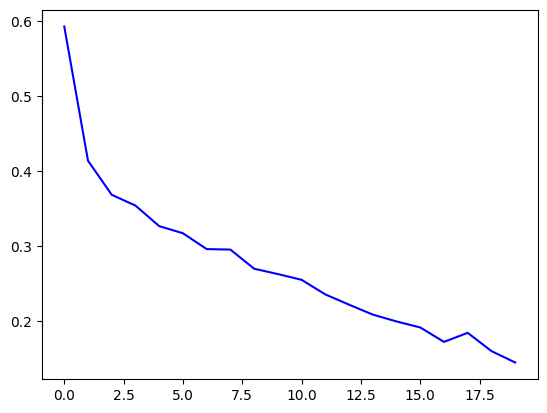

In [ ]:
plt.plot(history.history["loss"],color="blue",label="adam")

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adadelta, Adagrad
optimizers = [SGD(learning_rate=0.01), Adam(learning_rate=0.01), RMSprop(learning_rate=0.01)]

In [ ]:
ann.add(Dense(32, input_dim = 13, activation = 'relu'))
ann.add(Dense(32, activation = 'relu'))
ann.add(Dense(16,  activation = 'relu'))
ann.add(Dense(16, activation = 'relu'))
ann.add(Dense(8, activation = 'relu'))
ann.add(Dense(1, activation = 'sigmoid'))

In [ ]:
df=pd.read_csv('/content/Cardio_vascular (2).csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
df.rename(columns={'target':'disease'},inplace=True)

In [ ]:
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X=df.drop('disease',axis=1)
y=df[['disease']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [ ]:
def build_ann(optimizer):
    ann = Sequential()
    ann.add(Dense(32, input_dim= 13 ,activation='relu'))
    ann.add(Dense(32,activation='relu'))
    ann.add(Dense(16,activation='relu'))
    ann.add(Dense(16,activation='relu'))
    ann.add(Dense(8,activation='relu'))
    ann.add(Dense(1,activation='sigmoid'))
    ann.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return ann

optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
history_per_optimizer = {}

for optimizer in optimizers:
  ann = build_ann(optimizer)
  history = ann.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 30, batch_size = 10)
  history_per_optimizer[optimizer] = history


Epoch 1/30
82/82 [==============================] - 1s 5ms/step - loss: 0.7002 - accuracy: 0.4988 - val_loss: 0.6933 - val_accuracy: 0.5707
Epoch 2/30
82/82 [==============================] - 0s 3ms/step - loss: 0.7001 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.5707
Epoch 3/30
82/82 [==============================] - 0s 3ms/step - loss: 0.7000 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.5707
Epoch 4/30
82/82 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.4988 - val_loss: 0.6930 - val_accuracy: 0.5707
Epoch 5/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4988 - val_loss: 0.6930 - val_accuracy: 0.5707
Epoch 6/30
82/82 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.4988 - val_loss: 0.6929 - val_accuracy: 0.5707
Epoch 7/30
82/82 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.4988 - val_loss: 0.6928 - val_accuracy: 0.5707
Epoch 8/30
82/82 [==

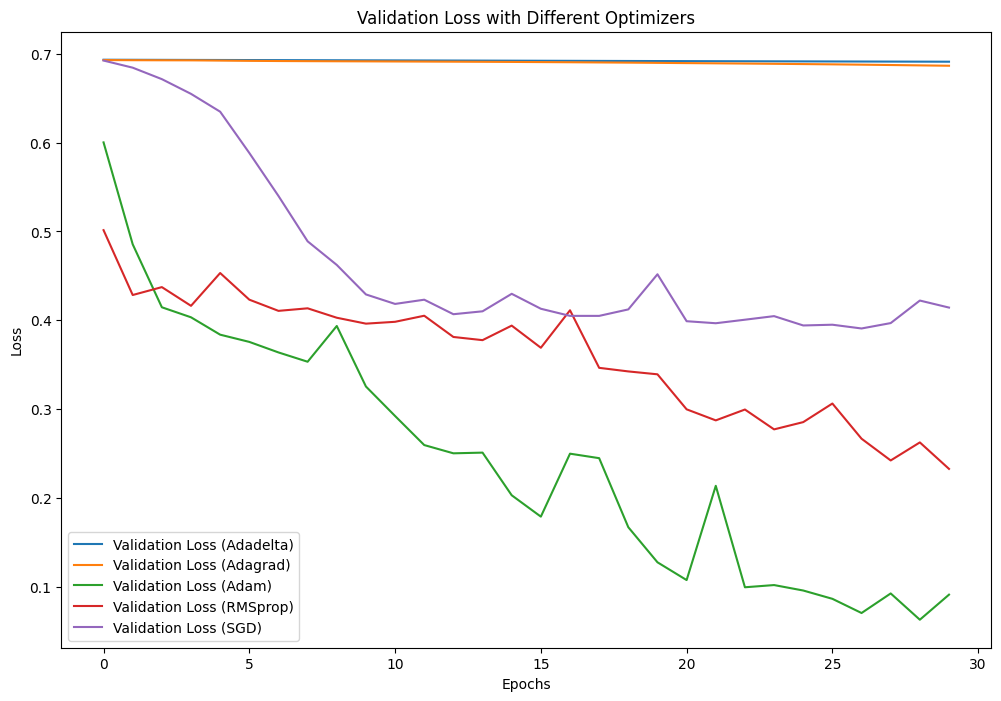

In [ ]:
#To check minimum validation loss using different optimizers
plt.figure(figsize=(12, 8))
for optimizer, history in history_per_optimizer.items():
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({optimizer})')

plt.title('Validation Loss with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()